In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from decimal import Decimal
import scipy.integrate

**Problem 1(a)**: Create a floating point variable initialized to 0.1 and print it out to full precision. What is the degree of floating point error that you find?

In [2]:
x = 0.1

print('x = {0:.60g}'.format(x))
print('x = {0:.60f}'.format(x))
print('x = ' + str(Decimal.from_float(x)))

x = 0.1000000000000000055511151231257827021181583404541015625
x = 0.100000000000000005551115123125782702118158340454101562500000
x = 0.1000000000000000055511151231257827021181583404541015625


Error is $\sim 5.551115 \times 10^{-18}$.  

Using single-precision instead:

In [3]:
x_float32 = np.float32(x)

print('x = {0:.60g}'.format(x_float32))
print('x = {0:.60f}'.format(x_float32))
# print('x = ' + str(Decimal.from_float(x_float32)))

x = 0.100000001490116119384765625
x = 0.100000001490116119384765625000000000000000000000000000000000


Error is $\sim 1.490116 \times 10^{-9}$.

**Problem 1(b)**: Using the method outlined in class, determine the roundoff error, $\epsilon$, for your machine.

In [4]:
eps = 1.0

while 1.0 + eps > 1.0:
    print('epsilon = {0:.60f}'.format(eps))
    eps = eps / 2.0

epsilon = 1.000000000000000000000000000000000000000000000000000000000000
epsilon = 0.500000000000000000000000000000000000000000000000000000000000
epsilon = 0.250000000000000000000000000000000000000000000000000000000000
epsilon = 0.125000000000000000000000000000000000000000000000000000000000
epsilon = 0.062500000000000000000000000000000000000000000000000000000000
epsilon = 0.031250000000000000000000000000000000000000000000000000000000
epsilon = 0.015625000000000000000000000000000000000000000000000000000000
epsilon = 0.007812500000000000000000000000000000000000000000000000000000
epsilon = 0.003906250000000000000000000000000000000000000000000000000000
epsilon = 0.001953125000000000000000000000000000000000000000000000000000
epsilon = 0.000976562500000000000000000000000000000000000000000000000000
epsilon = 0.000488281250000000000000000000000000000000000000000000000000
epsilon = 0.000244140625000000000000000000000000000000000000000000000000
epsilon = 0.000122070312500000000000000000000000000

Using single-precision instead:

In [5]:
eps_float32 = np.float32(1.0)
one_float32 = np.float32(1.0)

while one_float32 + eps_float32 > one_float32:
    print('epsilon = {0:.60f}'.format(eps_float32))
    eps_float32 = eps_float32 / np.float32(2.0)

epsilon = 1.000000000000000000000000000000000000000000000000000000000000
epsilon = 0.500000000000000000000000000000000000000000000000000000000000
epsilon = 0.250000000000000000000000000000000000000000000000000000000000
epsilon = 0.125000000000000000000000000000000000000000000000000000000000
epsilon = 0.062500000000000000000000000000000000000000000000000000000000
epsilon = 0.031250000000000000000000000000000000000000000000000000000000
epsilon = 0.015625000000000000000000000000000000000000000000000000000000
epsilon = 0.007812500000000000000000000000000000000000000000000000000000
epsilon = 0.003906250000000000000000000000000000000000000000000000000000
epsilon = 0.001953125000000000000000000000000000000000000000000000000000
epsilon = 0.000976562500000000000000000000000000000000000000000000000000
epsilon = 0.000488281250000000000000000000000000000000000000000000000000
epsilon = 0.000244140625000000000000000000000000000000000000000000000000
epsilon = 0.000122070312500000000000000000000000000

**Problem 1(c)**: Compare answers with classmates.

**Problem 2**: Evaluate the general integral:  

$$ I = \int_a^b f(x) \, dx $$  

$$ \text{Rectangle rule:} \quad I = \sum_{i=1}^N f(x_i) \, \Delta x, \quad \quad
\text{Trapezoid rule:} \quad I = \frac{\Delta x}{2} \sum_{i=1}^N [f(x_i) + f(x_{i+1})], $$  

where $N$ is the number of equal-sized integration steps and  

$$ \Delta x = \frac{(b-a)}{N}, \quad x_i = a + (i - 1) \Delta x. $$  

**(a)** Numerically compute the integral  

$$ \int_1^5 \frac{1}{x^{3/2}} \, dx $$  

with both methods above and plot the error in the numerical integral against the step size $\Delta x$ for both
methods. Approximately how many steps are required to get an answer with fractional error $|I - I_{exact}| /
I_{exact} < 10^{-3}$ for both methods? What about $10^{-5}$?

In [6]:
# Function to compute f(x_i) = x_i^(-1.5) for each x_i.
def function_values(start, stop, num_points):
    
    x_vals = np.linspace(start, stop, num=num_points)
    y_vals = np.ones(num_points) * np.power(x_vals, -1.5)
    
    return y_vals

# Function to numerically integrate using the rectangle rule.
def rectangle_rule(start, stop, num_points):
    
    dx = (stop - start) / (num_points - 1)              # Spacing between points.
    y_vals = function_values(start, stop, num_points)
    
    integral = dx * np.sum(y_vals[0:(num_points - 2)])  # Exclude last point (x_N = b).
    
    return integral

# Function to numerically integrate using the trapezoid rule.
def trapezoid_rule(start, stop, num_points):
    
    dx = (stop - start) / (num_points - 1)
    y_vals = function_values(start, stop, num_points)
    
    integral = (dx / 2.0) * (y_vals[0] + y_vals[num_points - 1] + 2.0 * np.sum(y_vals[1:(num_points - 1)]))
    
    return integral

# Function to compute the relative error.
def frac_err(int_exact, int_num):
    
    return abs(int_exact - int_num) / int_exact

In [7]:
# Integration limits.
a = 1.0
b = 5.0

# Exact integral.
I_exact = 0.4 * (5.0 - np.sqrt(5.0))

print('I_exact = {0:.10f}'.format(I_exact))

N_vals_r        = np.asarray([5, 10, 20, 50, 100, 200, 500, 800, 1000, 1200, 
                              1325, 1326, 
                              1500, 1800, 2000, 5000,
                              8000, 10000, 20000, 50000, 80000, 
                              100000, 120000, 
                              132363, 132364,
                              150000, 180000, 200000])
N_vals_t        = np.asarray([5, 10, 20, 
                              30, 43, 44,
                              50, 100, 200, 
                              422, 423,
                              500, 800, 1000, 1200, 
                              1500, 2000, 5000, 8000, 10000])

frac_err_vals_r = np.zeros(len(N_vals_r))
frac_err_vals_t = np.zeros(len(N_vals_t))

print('\nRectangle rule:')
for i in range(len(N_vals_r)):
    
    I_num = rectangle_rule(a, b, N_vals_r[i])    
    frac_err_vals_r[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.10f}\tfrac_err = {2:.10f}'.format(N_vals_r[i], I_num, frac_err_vals_r[i]))
    
print('\nTrapezoid rule:')
for i in range(len(N_vals_t)):
    
    I_num = trapezoid_rule(a, b, N_vals_t[i])    
    frac_err_vals_t[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.10f}\tfrac_err = {2:.10f}'.format(N_vals_t[i], I_num, frac_err_vals_t[i]))

I_exact = 1.1055728090

Rectangle rule:
N = 5     	I_num = 1.5460034803	frac_err = 0.3983732846
N = 10    	I_num = 1.2858164811	frac_err = 0.1630319330
N = 20    	I_num = 1.1867419773	frac_err = 0.0734182024
N = 50    	I_num = 1.1360717145	frac_err = 0.0275865191
N = 100   	I_num = 1.1205101694	frac_err = 0.0135109694
N = 200   	I_num = 1.1129649962	frac_err = 0.0066862961
N = 500   	I_num = 1.1085115222	frac_err = 0.0026580910
N = 800   	I_num = 1.1074066814	frac_err = 0.0016587531
N = 1000  	I_num = 1.1070391550	frac_err = 0.0013263224
N = 1200  	I_num = 1.1067943466	frac_err = 0.0011048911
N = 1325  	I_num = 1.1066789289	frac_err = 0.0010004948
N = 1326  	I_num = 1.1066780934	frac_err = 0.0009997391
N = 1500  	I_num = 1.1065497052	frac_err = 0.0008836109
N = 1800  	I_num = 1.1063867038	frac_err = 0.0007361748
N = 2000  	I_num = 1.1063052309	frac_err = 0.0006624818
N = 5000  	I_num = 1.1058655977	frac_err = 0.0002648299
N = 8000  	I_num = 1.1057557738	frac_err = 0.0001654932
N = 1000

Using the rectangle rule, 1326 and 132364 steps are required to achieve sub-$10^{-3}$ and sub-$10^{-5}$ accuracy, respectively. Using the trapezoid rule, 44 and 423 steps are required to achieve sub-$10^{-3}$ and sub-$10^{-5}$ accuracy, respectively.

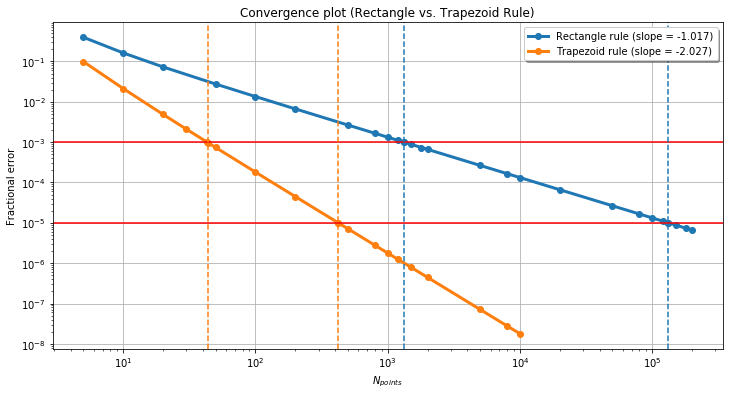

In [8]:
# Convergence plots
fit_r = np.polyfit(np.log10(N_vals_r), np.log10(frac_err_vals_r), 1)
fit_t = np.polyfit(np.log10(N_vals_t), np.log10(frac_err_vals_t), 1)

label_r = "Rectangle rule (slope = {0:.3f})".format(fit_r[0])
label_t = "Trapezoid rule (slope = {0:.3f})".format(fit_t[0])

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(N_vals_r, frac_err_vals_r, '-o', label=label_r, linewidth=3)
plt.plot(N_vals_t, frac_err_vals_t, '-o', label=label_t, linewidth=3)

# Plot horizontal lines where fractional error is 1.0e-3, 1.0e-5.
plt.axhline(y=1.0e-3, color='r', linestyle='-')
plt.axhline(y=1.0e-5, color='r', linestyle='-')

# Plot vertical lines where rectangle rule achieves sub-1.0e-3, 1.0e-5 accuracy.
plt.axvline(x=1326, color='tab:blue', linestyle='--')
plt.axvline(x=132364, color='tab:blue', linestyle='--')

# Plot vertical lines where trapezoid rule achieves sub-1.0e-3, 1.0e-5 accuracy.
plt.axvline(x=44, color='tab:orange', linestyle='--')
plt.axvline(x=423, color='tab:orange', linestyle='--')

plt.grid(True)
plt.xlabel('$N_{points}$')
plt.ylabel('Fractional error')
plt.title('Convergence plot (Rectangle vs. Trapezoid Rule)')
plt.xscale('log')
plt.yscale('log')
plt.legend(shadow=True)
plt.show()

**(b)** Compare the results of your two methods to a built-in routine. What is the order accuracy of the built-in
method? What is the default approach to integration? What step sizes do you need to achieve similar results?

In [9]:
# SciPy trapezoid rule.
N_vals_trap = np.copy(N_vals_t)

# Simpson's rule (number of samples must be odd).
N_vals_simp = np.asarray([5, 11, 13, 21, 37, 51, 101, 201, 501, 801, 1001, 1201, 1501, 2001])

# Romberg integration (number of samples must be 2^k + 1).
N_vals_romb = np.asarray([5, 9, 17, 33, 65, 129, 257])

frac_err_vals_trap = np.zeros(len(N_vals_trap))
frac_err_vals_simp = np.zeros(len(N_vals_simp))
frac_err_vals_romb = np.zeros(len(N_vals_romb))

print('\nscipy.integrate.trapz:')
for i in range(len(N_vals_trap)):
    
    dx = (b - a) / (N_vals_trap[i] - 1)
    f_vals = function_values(a, b, N_vals_trap[i])
    
    I_num = scipy.integrate.trapz(f_vals, dx=dx)   
    frac_err_vals_trap[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.15f}\tfrac_err = {2:.15f}'.format(N_vals_trap[i], 
                                                                      I_num, frac_err_vals_trap[i]))

print('\nscipy.integrate.simps:')
for i in range(len(N_vals_simp)):
    
    dx = (b - a) / (N_vals_simp[i] - 1)
    f_vals = function_values(a, b, N_vals_simp[i])
    
    I_num = scipy.integrate.simps(f_vals, dx=dx)   
    frac_err_vals_simp[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.15f}\tfrac_err = {2:.15f}'.format(N_vals_simp[i], 
                                                                      I_num, frac_err_vals_simp[i]))

print('\nscipy.integrate.romb:')
for i in range(len(N_vals_romb)):
    
    dx = (b - a) / (N_vals_romb[i] - 1)
    f_vals = function_values(a, b, N_vals_romb[i])
    
    I_num = scipy.integrate.romb(f_vals, dx)   
    frac_err_vals_romb[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.15f}\tfrac_err = {2:.15f}'.format(N_vals_romb[i], 
                                                                      I_num, frac_err_vals_romb[i]))


scipy.integrate.trapz:
N = 5     	I_num = 1.215724839873145	frac_err = 0.099633447907140
N = 10    	I_num = 1.129179812436650	frac_err = 0.021352735201508
N = 20    	I_num = 1.110978975059744	frac_err = 0.004889923138169
N = 30    	I_num = 1.107901868158219	frac_err = 0.002106653798986
N = 43    	I_num = 1.106684823336240	frac_err = 0.001005826416047
N = 44    	I_num = 1.106633768203851	frac_err = 0.000959646614977
N = 50    	I_num = 1.106390088566790	frac_err = 0.000739236312663
N = 100   	I_num = 1.105773170959915	frac_err = 0.000181229095180
N = 200   	I_num = 1.105622406363347	frac_err = 0.000044861236510
N = 422   	I_num = 1.105583891066892	frac_err = 0.000010023823594
N = 423   	I_num = 1.105583838608177	frac_err = 0.000009976374241
N = 500   	I_num = 1.105580697338625	frac_err = 0.000007135069239
N = 800   	I_num = 1.105575885774099	frac_err = 0.000002782968240
N = 1000  	I_num = 1.105574777152661	frac_err = 0.000001780210729
N = 1200  	I_num = 1.105574175317768	frac_err = 0.00

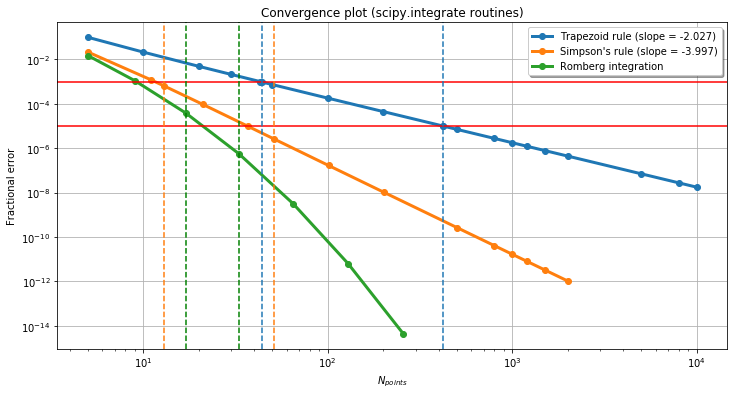

In [10]:
# Convergence plots
fit_trap = np.polyfit(np.log10(N_vals_trap), np.log10(frac_err_vals_trap), 1)
fit_simp = np.polyfit(np.log10(N_vals_simp), np.log10(frac_err_vals_simp), 1)

label_trap = "Trapezoid rule (slope = {0:.3f})".format(fit_trap[0])
label_simp = "Simpson's rule (slope = {0:.3f})".format(fit_simp[0])
label_romb = "Romberg integration"

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(N_vals_trap, frac_err_vals_trap, '-o', label=label_trap, linewidth=3)
plt.plot(N_vals_simp, frac_err_vals_simp, '-o', label=label_simp, linewidth=3)
plt.plot(N_vals_romb, frac_err_vals_romb, '-o', label=label_romb, linewidth=3)

# Plot horizontal lines where fractional error is 1.0e-3, 1.0e-5.
plt.axhline(y=1.0e-3, color='r', linestyle='-')
plt.axhline(y=1.0e-5, color='r', linestyle='-')

# Plot vertical lines where rectangle rule achieves sub-1.0e-3, 1.0e-5 accuracy.
plt.axvline(x=44, color='tab:blue', linestyle='--')
plt.axvline(x=423, color='tab:blue', linestyle='--')

# Plot vertical lines where trapezoid rule achieves sub-1.0e-3, 1.0e-5 accuracy.
plt.axvline(x=13, color='tab:orange', linestyle='--')
plt.axvline(x=51, color='tab:orange', linestyle='--')

# Plot vertical lines where trapezoid rule achieves sub-1.0e-3, 1.0e-5 accuracy.
plt.axvline(x=17, color='g', linestyle='--')
plt.axvline(x=33, color='g', linestyle='--')

plt.grid(True)
plt.xlabel('$N_{points}$')
plt.ylabel('Fractional error')
plt.title('Convergence plot (scipy.integrate routines)')
plt.xscale('log')
plt.yscale('log')
plt.legend(shadow=True)
plt.show()

**Problem 3(a)**: Write a program to compute the orbit of Earth around the Sun.

In [11]:
# Function to return RHS of equations of motion for orbit. X, Y = position, velocity vectors.
def rhs(X, V):
    
    GM = 4.0*math.pi**2             # In units of AU, year, Msun
    r = np.sqrt(X[0]**2 + X[1]**2)  # Radius
    
    x_dot = V[0]
    y_dot = V[1]
    
    u_dot = -GM * X[0] / r**3
    v_dot = -GM * X[1] / r**3
    
    return x_dot, y_dot, u_dot, v_dot

# Function for first-order Euler integration.
def Euler_integration(dt):
    
    GM = 4.0*math.pi**2  # In units of AU, year, Msun
    
    # Semi-major axis (in AU) and eccentricity.
    a = 1.000001018
    e = 0.0167086
    
    # Initial conditions
    t = 0.0
    x = 0.0
    y = a * (1.0 - e)
    u = -np.sqrt((GM / a) * ((1.0 + e) / (1.0 - e)))
    v = 0.0
    
    # Store coordinates.
    x_coords = [x]
    y_coords = [y]
    
    # Integrate for one orbit (t = 0 to t = 1).
    t_max = 1.0
    while t < t_max:
        
        if t + dt > t_max:
            dt = t_max - t
        
        x_dot, y_dot, u_dot, v_dot = rhs([x, y], [u, v])
        
        # Advance by one step.
        x2 = x + dt * x_dot
        y2 = y + dt * y_dot
        u2 = u + dt * u_dot
        v2 = v + dt * v_dot
        
        t += dt
        
        # Store values.
        x_coords.append(x2)
        y_coords.append(y2)
        
        x = x2
        y = y2
        u = u2
        v = v2
        
    return x_coords, y_coords

# Function for fourth-order Runge-Kutta integration.
def RK4_integration(dt):
    
    GM = 4.0*math.pi**2  # In units of AU, year, Msun
    
    # Semi-major axis (in AU) and eccentricity.
    a = 1.000001018
    e = 0.0167086
    
    # Initial conditions
    t = 0.0
    x = 0.0
    y = a * (1.0 - e)
    u = -np.sqrt((GM / a) * ((1.0 + e) / (1.0 - e)))
    v = 0.0
    
    # Store coordinates
    x_coords = [x]
    y_coords = [y]
    
    # Integrate for one orbit (t = 0 to t = 1).
    t_max = 1.0
    while t < t_max:
        
        if t + dt > t_max:
            dt = t_max - t
        
        k1_x, k1_y, k1_u, k1_v = rhs([x, y], [u, v])
        k2_x, k2_y, k2_u, k2_v = rhs([x + 0.5 * dt * k1_x, y + 0.5 * dt * k1_y], 
                                     [u + 0.5 * dt * k1_u, v + 0.5 * dt * k1_v])
        k3_x, k3_y, k3_u, k3_v = rhs([x + 0.5 * dt * k2_x, y + 0.5 * dt * k2_y], 
                                     [u + 0.5 * dt * k2_u, v + 0.5 * dt * k2_v])
        k4_x, k4_y, k4_u, k4_v = rhs([x + dt * k3_x, y + dt * k3_y], 
                                     [u + dt * k3_u, v + dt * k3_v])
        
        # Advance by one step.
        x2 = x + (dt / 6.0) * (k1_x + 2.0 * (k2_x + k3_x) + k4_x)
        y2 = y + (dt / 6.0) * (k1_y + 2.0 * (k2_y + k3_y) + k4_y)
        u2 = u + (dt / 6.0) * (k1_u + 2.0 * (k2_u + k3_u) + k4_u)
        v2 = v + (dt / 6.0) * (k1_v + 2.0 * (k2_v + k3_v) + k4_v)
        
        t += dt
        
        # Store values.
        x_coords.append(x2)
        y_coords.append(y2)
        
        x = x2
        y = y2
        u = u2
        v = v2
        
    return x_coords, y_coords

# Function to calculate fractional error in radius after one orbit.
def frac_error_radius(x_coords, y_coords):

    n = len(x_coords)
    
    x0 = x_coords[0]
    y0 = y_coords[0]
    xn = x_coords[n - 1]
    yn = y_coords[n - 1]
    
    r0 = np.sqrt(x0**2 + y0**2)
    rn = np.sqrt(xn**2 + yn**2)
    
    error = abs(r0 - rn) / r0
    
    return error

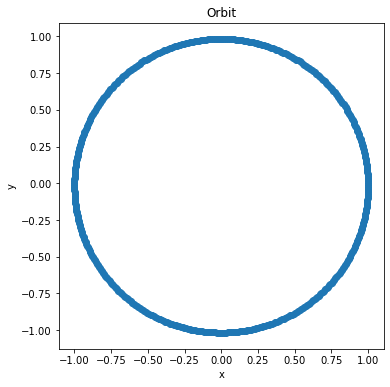

In [12]:
N = 500
dt = 1.0 / (N - 1)

#x_coords, y_coords = Euler_integration(dt)
x_coords, y_coords = RK4_integration(dt)

plt.scatter(x_coords, y_coords)
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)
plt.title('Orbit')
plt.show()

In [13]:
n_vals = np.asarray([10, 20, 50, 100, 120, 150, 200, 500, 1000, 2000, 5000, 8000, 
                     10000, 20000, 50000, 100000])

frac_err_eul = np.zeros(len(n_vals))
frac_err_rk4   = np.zeros(len(n_vals))

for i in range(len(n_vals)):
    
    dt = 1.0 / (n_vals[i] - 1)
    
    x_eul, y_eul = Euler_integration(dt)
    x_rk4, y_rk4 = RK4_integration(dt)
    
    frac_err_eul[i] = frac_error_radius(x_eul, y_eul)
    frac_err_rk4[i] = frac_error_radius(x_rk4, y_rk4)

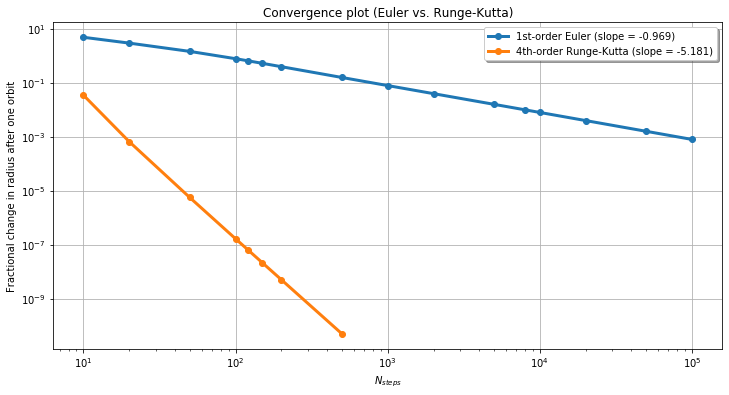

In [14]:
# Convergence plots
fit_eul = np.polyfit(np.log10(n_vals), np.log10(frac_err_eul), 1)
fit_rk4 = np.polyfit(np.log10(n_vals)[0:8], np.log10(frac_err_rk4)[0:8], 1)

label_eul = "1st-order Euler (slope = {0:.3f})".format(fit_eul[0])
label_rk4 = "4th-order Runge-Kutta (slope = {0:.3f})".format(fit_rk4[0])

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(n_vals, frac_err_eul, '-o', label=label_eul, linewidth=3)
plt.plot(n_vals[0:8], frac_err_rk4[0:8], '-o', label=label_rk4, linewidth=3)

plt.grid(True)
plt.xlabel('$N_{steps}$')
plt.ylabel('Fractional change in radius after one orbit')
plt.title('Convergence plot (Euler vs. Runge-Kutta)')
plt.xscale('log')
plt.yscale('log')
plt.legend(shadow=True)
plt.show()

**Problem 2(b)**: Write a program that computes the integral  

$$ D_c = \int_0^z dz' \, [\Omega_m(1 + z')^3 + (1 - \Omega_m - \Omega_{\Lambda})(1 + z')^2 +
\Omega_{\Lambda}]^{-1}.$$  

What is the comoving distance ($D_c \times c H_0^{-1} = D_c \times 3000 h^{-1}$ Mpc) to redshift $z = 2$ in a universe with $\Omega_m = 0.3$ and $\Omega_{\Lambda} = 0.7$? Make a plot of the comoving distance in Mpc versus redshift for $z = 0$ through $z = 10$.

In [15]:
# Function to compute f(z_i) for each z_i.
def function_values_comoving(start, stop, n, omega_m, omega_l):
    
    z = np.linspace(start, stop, num=n)
    f1 = omega_m * (1.0 + z)**3
    f2 = (1.0 - omega_m - omega_l) * (1.0 + z)**2
    f = (f1 + f2 + omega_l) ** (-0.5)
    
    return f

# Function to numerically integrate using the trapezoid rule.
def trapezoid_rule_comoving(start, stop, n, omega_m, omega_l):
    
    dz = (stop - start) / (n - 1)
    f_vals = function_values_comoving(start, stop, n, omega_m, omega_l)
    
    integral = (dz / 2.0) * (f_vals[0] + f_vals[n - 1] + 2.0 * np.sum(f_vals[1:(n - 1)]))
    
    return integral

In [16]:
# Comoving distance to redshift z = 2.
om = 0.3
ol = 0.7
n = 100000

d2 = 3000.0 * trapezoid_rule_comoving(0.0, 2.0, n, om, ol)
print('Comoving distance to z = 2: {0:.6g} Mpc h^-1'.format(d2))
print('Comoving distance to z = 2: {0:.6g} Mpc'.format(d2 * 0.70**(-1)))

Comoving distance to z = 2: 3628.41 Mpc h^-1
Comoving distance to z = 2: 5183.45 Mpc


In [17]:
# Comoving distance from z = 0 to z = 10.
z_vals = np.linspace(0.0, 10.0, num=100)
d_vals = np.zeros(100)

for i in range(len(z_vals)): 
    d_vals[i] = 3000.0 * trapezoid_rule_comoving(0.0, z_vals[i], n, om, ol)

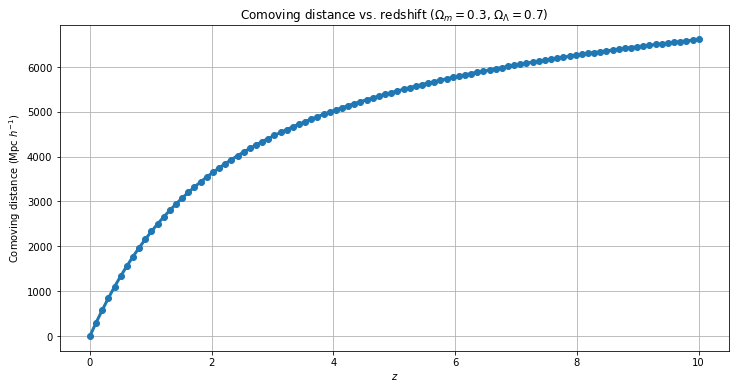

In [18]:
# Plot comoving distance as a function of redshift.
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(z_vals, d_vals, '-o', linewidth=3)

plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('Comoving distance (Mpc $h^{-1}$)')
plt.title('Comoving distance vs. redshift ($\Omega_m = 0.3$, $\Omega_{\Lambda} = 0.7$)')

plt.show()

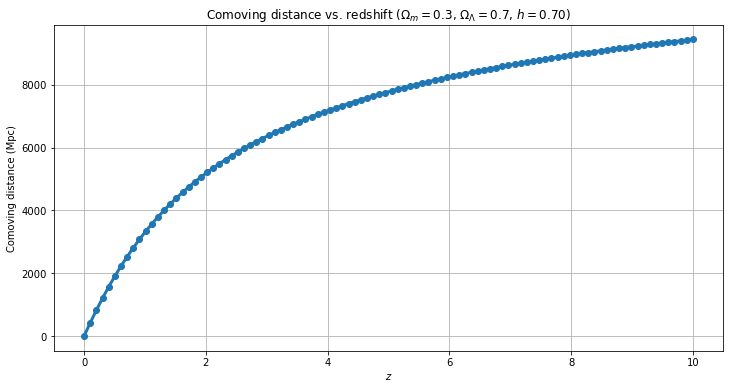

In [19]:
# Plot comoving distance as a function of redshift.
plt.rcParams["figure.figsize"] = (12 ,6)

plt.plot(z_vals, (d_vals * 0.70**(-1)), '-o', linewidth=3)

plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('Comoving distance (Mpc)')
plt.title('Comoving distance vs. redshift ($\Omega_m = 0.3$, $\Omega_{\Lambda} = 0.7$, $h = 0.70$)')

plt.show()